# TAM analysis

## Libraries

In [2]:
import pandas as pd
from utils import load_or_download_csv
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
# File path and Google Drive link
path = '../bases_depuradas/gasto_granular.csv'
gdrive_link = 'https://drive.google.com/uc?export=download&id=1RlL0Ts_TDv1EJvrBSa-RPqrlyoAnNWbY'

try:
    df_gasto = load_or_download_csv(path, gdrive_link)
    df_gasto.head()
except Exception as e:
    print(f"Error: {str(e)}")

In [5]:
#Modify the ubica_geo column to have the same format as the other datasets
#If the len of the ubica_geo is less than 5, add 0 at the beginning until it has a length of 5

df_gasto['ubica_geo'] = df_gasto['ubica_geo'].apply(lambda x: '0'*(5-len(str(x))) + str(x) if len(str(x)) < 5 else x)
df_gasto

,ï»¿folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,sexo_jefe,edad_jefe,educa_jefe,tot_integ,...,desc_mun,educa_jefe_desc,proporcion_mayores,sexo_jefe_desc_Mujer,est_socio_desc_Bajo,est_socio_desc_Medio alto,est_socio_desc_Medio bajo,tam_loc_desc_Localidades con 15 000 a 99 999 habitantes,tam_loc_desc_Localidades con 2 500 a 14 999 habitantes,tam_loc_desc_Localidades con menos de 2500 habitantes
0,100005002,1,01001,1,4,3,2,91,3,3,...,Aguascalientes,Primaria incompleta,0.333333,True,False,False,False,False,False,False
1,100005003,1,01001,1,4,3,1,68,8,2,...,Aguascalientes,Preparatoria completa,0.500000,False,False,False,False,False,False,False
2,100005004,1,01001,1,4,3,1,56,10,3,...,Aguascalientes,Profesional completa,0.000000,False,False,False,False,False,False,False
3,100012002,1,01001,1,3,2,1,87,11,4,...,Aguascalientes,Posgrado,0.500000,False,False,True,False,False,False,False
4,100012002,2,01001,1,3,2,1,27,8,1,...,Aguascalientes,Preparatoria completa,0.000000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90097,3260797907,1,32046,4,2,560,1,28,6,3,...,Tepetongo,Secundaria completa,0.000000,False,False,False,True,False,False,True
90098,3260797908,1,32046,4,2,560,1,52,5,3,...,Tepetongo,Secundaria incompleta,0.000000,False,False,False,True,False,False,True
90099,3260797909,1,32046,4,2,560,1,37,4,4,...,Tepetongo,Primaria completa,0.000000,False,False,False,True,False,False,True
90100,3260797910,1,32046,4,2,560,1,63,6,2,...,Tepetongo,Secundaria completa,0.000000,False,False,False,True,False,False,True


In [16]:
# Group by 'desc_ent' and 'desc_mun' and calculate the mean for the specified columns
grouped_df = df_gasto.groupby(['desc_ent', 'desc_mun','ubica_geo'])[['cuidados', 'salud', 'atenc_ambu', 'hospital', 'medicinas',]].mean()
grouped_df.sort_values(by = "medicinas", ascending = False,inplace = True)

#make it long format by making 'desc_ent' and 'desc_mun' into columns
grouped_df.reset_index(inplace=True)
grouped_df.head(60)

,desc_ent,desc_mun,ubica_geo,cuidados,salud,atenc_ambu,hospital,medicinas
0,Jalisco,Tequila,14094,1080.644444,3203.145000,375.541111,0.000000,2827.603889
1,Jalisco,Ocotlan,14063,1557.422174,3152.065217,1397.584348,0.000000,1754.480870
2,Jalisco,Tenamaxtlan,14090,1402.720000,2754.239091,763.480909,269.910455,1720.847727
3,Querétaro,Landa De Matamoros,22010,1656.771842,3429.334211,1750.693684,0.000000,1678.640526
4,Hidalgo,Tlaxcoapan,13074,1243.516000,4159.616000,2785.754000,0.000000,1373.862000
5,Yucatán,Mococha,31051,1995.479444,2394.707222,1158.251667,0.000000,1236.455556
6,Tlaxcala,Chiautempan,29010,1565.823824,1641.658824,316.349412,178.675882,1146.633529
7,Oaxaca,Oaxaca De Juarez,20067,2526.681511,3342.592662,1429.246691,883.179424,1030.166547
8,Hidalgo,Zapotlan De Juarez,13082,2442.694762,2128.170952,1142.228095,0.000000,985.942857
9,Oaxaca,Union Hidalgo,20557,1874.187907,2846.086977,1880.595814,0.000000,965.491163


In [10]:
#read the shapefile mun21gw.shp
municipios = gpd.read_file('../raws/shp/municipios/mun21gw.shp')

In [11]:
#Rename CVGEO column to ubica_geo
municipios.rename(columns={'CVEGEO': 'ubica_geo'}, inplace=True)

In [12]:
municipios = municipios[['ubica_geo', 'NOM_ENT', 'NOM_MUN', 'geometry','AREA','PERIMETER']]
municipios

,ubica_geo,NOM_ENT,NOM_MUN,geometry,AREA,PERIMETER
0,01008,Aguascalientes,San JosÃ© de Gracia,"POLYGON ((-102.35385 22.12064, -102.35426 22.1...",857.790574,181537.599568
1,01009,Aguascalientes,TepezalÃ¡,"POLYGON ((-102.16213 22.34851, -102.16149 22.3...",229.661012,89329.531706
2,01010,Aguascalientes,El Llano,"POLYGON ((-101.89778 21.95839, -101.89037 21.9...",504.050989,144866.490027
3,01011,Aguascalientes,San Francisco de los Romo,"POLYGON ((-102.14088 22.07534, -102.14086 22.0...",137.770176,103689.065529
4,01001,Aguascalientes,Aguascalientes,"POLYGON ((-102.09775 22.02325, -102.09857 22.0...",1166.359248,256631.025247
...,...,...,...,...,...,...
2466,32014,Zacatecas,General Francisco R. MurguÃ­a,"POLYGON ((-102.89148 24.46084, -102.88558 24.4...",4783.818783,397050.472309
2467,32043,Zacatecas,SusticacÃ¡n,"POLYGON ((-103.10931 22.57209, -103.11083 22.5...",197.478110,90595.389398
2468,32045,Zacatecas,TepechitlÃ¡n,"POLYGON ((-103.1586 21.63311, -103.15928 21.63...",539.122963,147600.356438
2469,32046,Zacatecas,Tepetongo,"POLYGON ((-103.10931 22.57209, -103.11007 22.5...",716.921482,202202.709428


In [14]:
import geopandas as gpd
import folium
import ipywidgets as widgets
from IPython.display import display

# Assuming 'municipios' is your GeoDataFrame

# Convert the GeoDataFrame to GeoJSON
municipios = municipios.to_crs(epsg=4326)

# Create a map centered on Mexico
bounds = municipios.total_bounds
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2
m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Dropdown to select state (NOM_ENT)
dropdown = widgets.Dropdown(
    options=municipios['NOM_ENT'].unique(),
    description='Select State:',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def update_map(state):
    with output:
        output.clear_output()
        
        # Filter GeoDataFrame by selected state
        filtered_data = municipios[municipios['NOM_ENT'] == state]

        # Clear existing map data
        m = folium.Map(location=[center_lat, center_lon], zoom_start=5)

        # Add the filtered municipalities to the map
        folium.GeoJson(filtered_data.to_json(), name='Municipalities').add_to(m)
        
        # Fit the map to the filtered data bounds
        if not filtered_data.empty:
            bounds = filtered_data.total_bounds
            m.fit_bounds([[bounds[1], bounds[0]], [bounds[3], bounds[2]]])
        
        # Add layer control to the map
        folium.LayerControl().add_to(m)

        # Display the map
        display(m)

# Update the map when the dropdown selection changes
dropdown.observe(lambda change: update_map(change['new']), names='value')

# Display the dropdown and output area
display(dropdown, output)


Dropdown(description='Select State:', options=('Aguascalientes', 'Baja California', 'Baja California Sur', 'Ca…

Output()

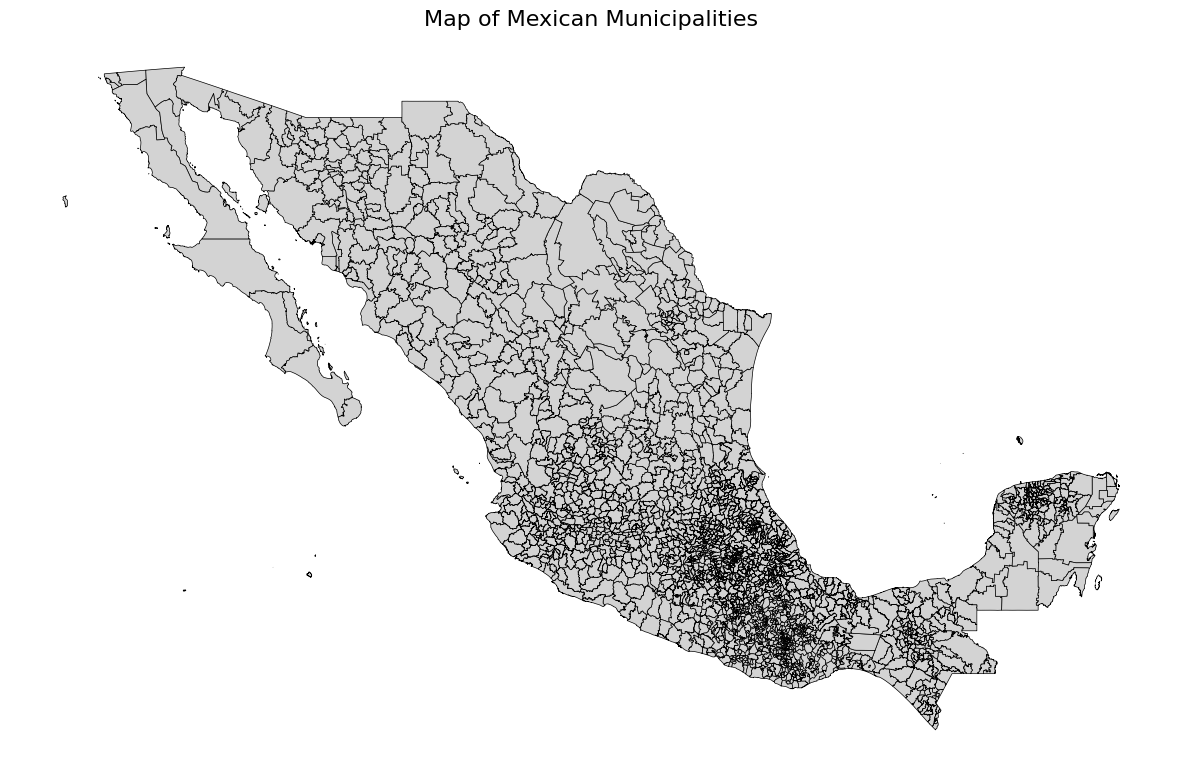

In [14]:
# Create the plot
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the municipalities
municipios.plot(ax=ax, edgecolor='black', linewidth=0.5, facecolor='lightgrey')

# Remove axis
ax.axis('off')

# Add a title
plt.title('Map of Mexican Municipalities', fontsize=16)

# Show the plot
plt.show()